In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from matplotlib import rcParams

In [4]:
orders = pd.read_csv('./data/Orders.csv')

In [31]:
returns = pd.read_csv('./data/Returns.csv')

In [75]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [7]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [11]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [12]:
orders['Profit']

0           $62.15
1         -$288.77
2          $919.97
3          -$96.54
4          $311.52
5          $763.28
6          $564.84
7          $996.48
8           $54.71
9            $5.48
10           $4.66
11         $647.55
12       $1,151.40
13         $622.02
14       $1,036.08
15         $186.95
16          -$2.52
17       $3,979.08
18          $28.40
19         $818.28
20         $276.84
21           $4.86
22         $358.02
23       $1,898.40
24         $445.52
25         $526.50
26         $720.36
27       $1,364.24
28         $121.44
29         $582.36
           ...    
51260       -$1.11
51261       $51.50
51262       $16.01
51263        $3.28
51264        $8.86
51265      $124.78
51266      -$18.83
51267       $16.59
51268        $2.16
51269       $12.00
51270        $5.88
51271       $22.05
51272        $0.56
51273        $0.04
51274        $3.72
51275      -$21.17
51276        $7.38
51277      -$49.57
51278       $12.60
51279       -$6.46
51280        $5.00
51281       

In [27]:
profitNoDollarSign = orders.Profit.apply(lambda x: x.replace('$',''))
profitClean = profitNoDollarSign.apply(lambda x: x.replace(',',''))
temp = list(map(float,profitClean))
orders['Profit'] = temp

AttributeError: 'float' object has no attribute 'replace'

In [136]:
salesNoDollarSign = orders.Sales.apply(lambda x: x.replace('$',''))
salesClean = salesNoDollarSign.apply(lambda x: x.replace(',',''))
temp = list(map(float,salesClean))
orders['Sales'] = temp

AttributeError: 'float' object has no attribute 'replace'

In [26]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [30]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [ ]:
1. Is there any seasonal trend of inventory in the company?
2. Is the seasonal trend the same for different categories?

In [32]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [36]:
from datetime import datetime

orders['Order.Date'] = pd.to_datetime(orders['Order.Date'],format ='%m/%d/%y')
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'],format ='%m/%d/%y')

In [38]:
orders.dtypes

Row.ID                     int64
Order.ID                  object
Order.Date        datetime64[ns]
Ship.Date         datetime64[ns]
Ship.Mode                 object
Customer.ID               object
Customer.Name             object
Segment                   object
Postal.Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping.Cost            float64
Order.Priority            object
dtype: object

In [40]:
orders['month'] = 
orders.groupby('Order.Date'.month)).sum()

SyntaxError: invalid syntax (<ipython-input-40-f0a2551494fa>, line 2)

In [65]:

orders['year'], orders['month'] = orders['Ship.Date'].dt.year, orders['Ship.Date'].dt.month

In [66]:
orders.groupby(['year','month']).sum()#to look

Row.ID  Postal.Code      Sales  Quantity  Discount    Profit  \
year month                                                                   
2012 1      10729869    3710875.0   86917.39      1278    61.588   8347.17   
     2      11417294    3442960.0   97211.09      1313    52.822  12585.50   
     3      13883930    7631970.0  135929.44      1693    69.772  13986.77   
     4      15365971    8005440.0  120926.44      2024    81.622  12558.15   
     5      15533851    6708383.0  140544.92      2070    89.874  11910.32   
     6      20951975    6721966.0  207178.36      2917   144.342  21665.30   
     7      14198264    9116009.0  132013.39      2018    91.896   8039.52   
     8      23607405    8893589.0  198829.57      2893   113.030  27411.45   
     9      25785906   13631848.0  274778.52      3584   134.200  31594.33   
     10     19767058    9644166.0  221234.18      2927   121.612  26596.17   
     11     30113669   18310574.0  289946.46      3831   164.934  31982.06   
     12     30450841   15302382.0  328814.24      4478   194.422  37864.19   
2013 1      16976044    4815772.0  150299.43      2106    84.332  13309.82   
     2      11073381    3515976.0   99318.11      1510    59.336  15682.73   
     3      16484014    6900085.0  157703.91      2088    93.220  17908.50   
     4      15813392    8113357.0  157671.65      2177    98.382  14271.86   
     5      20728284    7760183.0  200791.30      2852   108.810  32981.03   
     6      28136501    7785833.0  246931.71      3570   165.794  29003.72   
     7      18085451    6705688.0  170946.40      2550   109.832  21047.98   
     8      27160645    7204843.0  264788.74      3585   135.558  35652.07   
     9      32359882   13966354.0  307156.77      4247   164.790  33395.93   
     10     22003905   10137856.0  260076.64      3536   135.236  30511.55   
     11     36275342   16359976.0  306585.15      5040   208.986  30097.25   
     12     32854250   18653124.0  342801.14      4700   177.394  33449.99   
2014 1      19571171    4849364.0  212358.04      2621    97.096  28444.42   
     2      16583957    4445565.0  167858.56      2176    77.200  24061.79   
     3      19121715    7740388.0  204213.33      2679   115.286  23676.37   
     4      20025416    8648005.0  176578.11      2723   124.690  18825.21   
     5      22738750    8413144.0  221194.90      3416   133.984  25398.49   
     6      37256229   13353556.0  403254.18      5297   221.470  42822.84   
     7      25385920   10503771.0  260978.63      3622   129.110  34394.45   
     8      35554835    9711982.0  304761.23      4500   188.684  29293.18   
     9      43380811   18939685.0  383262.24      5927   241.268  41501.27   
     10     25974579   12788540.0  294879.30      3903   167.102  41798.52   
     11     37818435   19671376.0  338289.92      5363   215.408  47019.62   
     12     42307228   20528839.0  422848.95      5847   213.136  50863.91   
2015 1      26540511   10235463.0  253998.23      3250   142.720  25165.40   
     2      21164292    7445288.0  193664.09      2520   112.664  21962.70   
     3      29143669   12897409.0  264233.66      3752   146.316  36567.30   
     4      26892178   10683614.0  243545.00      3585   157.848  25838.87   
     5      32947364   13560428.0  273802.50      4141   183.798  29344.98   
     6      44309417   13364416.0  396496.54      5853   246.490  45702.35   
     7      30861311   12061532.0  267996.45      3918   173.480  29772.81   
     8      43368526   13968228.0  449538.75      5704   215.782  51464.62   
     9      49421651   24730302.0  475604.81      6606   256.972  65432.65   
     10     38638024   16602362.0  424786.09      5876   233.000  59077.64   
     11     52549735   24963326.0  533519.46      7578   300.002  63773.53   
     12     56641355   25439120.0  515311.52      7446   330.050  45949.43   
2016 1       7403492    2987740.0   60137.81      1022    44.388   7450.96   

            Shipping.Cost  
year mo

In [67]:
quantityOverTime = orders.groupby(['year','month']).sum()['Quantity']
quantityOverTime = quantityOverTime.reset_index()
quantityOverTime


,year,month,Quantity
0,2012,1,1278
1,2012,2,1313
2,2012,3,1693
3,2012,4,2024
4,2012,5,2070
5,2012,6,2917
6,2012,7,2018
7,2012,8,2893
8,2012,9,3584
9,2012,10,2927


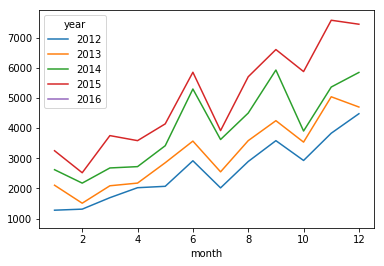

In [68]:
quantityOverTime = orders.groupby(['month','year']).sum()['Quantity'].unstack().plot()

In [ ]:
quantityOverTime = orders.groupby(['month','year']).sum()['Quantity'].unstack().plot()

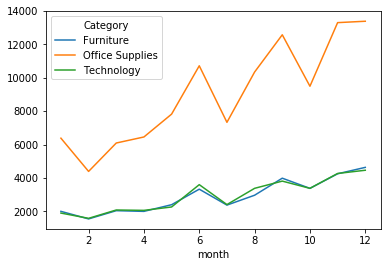

In [72]:
quantityOverTime = orders.groupby(['month','Category']).sum()['Quantity'].unstack().plot()
#We see yOy inventory increases
#We see stong monthly seasonality trends including larger inventory leading up to holiday time and slower in the beginning of the year
#we same the same trends across category with office supplies being most pronounced


In [113]:
combined = pd.merge(orders,returns,how="left",left_on='Order.ID',right_on='Order ID')
combined['Region_x']

0               Central US
1                  Oceania
2                  Oceania
3           Western Europe
4           Western Africa
5                  Oceania
6                  Oceania
7                  Oceania
8               Central US
9               Western US
10              Western US
11           Southern Asia
12            Western Asia
13           South America
14            Eastern Asia
15          Western Europe
16              Central US
17         Southern Europe
18                 Oceania
19          Eastern Africa
20          Eastern Europe
21              Western US
22            Eastern Asia
23         Northern Europe
24         Central America
25         Central America
26            Eastern Asia
27          Western Europe
28              Eastern US
29           Southern Asia
               ...        
51260           Central US
51261          Southern US
51262           Western US
51263      Central America
51264              Oceania
51265           Central US
5

In [91]:
returned = combined[combined['Returned']=='Yes']
returned
returned['Profit']


total = 0
for i in list(returned['Profit']):
    if i >0:
        total = total +i
print(total)

98203.3499999999


In [92]:
sum(returned['Profit'])

61370.74999999991

In [94]:

returned.groupby(['year']).sum()['Profit']

year
2012    17284.46
2013     9413.48
2014    17293.76
2015    17178.85
2016      200.20
Name: Profit, dtype: float64

In [102]:
badCustomers = returned.groupby(['Customer.ID','Customer.Name']).count()
badCustomers.sort_values(by ='Row.ID' ,ascending=False)

,,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Segment,Postal.Code,City,State,Country,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,year,month,Returned,Order ID,Region_y
Customer.ID,Customer.Name,,,,,,,,,,,,,,,,,,,,,
PO-1885082,Patrick O'Brill,13,13,13,13,13,13,0,13,13,13,...,13,13,13,13,13,13,13,13,13,13
JK-1609027,Juliana Krohn,11,11,11,11,11,11,0,11,11,11,...,11,11,11,11,11,11,11,11,11,11
TB-2140066,Tom Boeckenhauer,10,10,10,10,10,10,0,10,10,10,...,10,10,10,10,10,10,10,10,10,10
MY-1829582,Muhammed Yedwab,10,10,10,10,10,10,0,10,10,10,...,10,10,10,10,10,10,10,10,10,10
SG-200801404,Sandra Glassco,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
KH-165101404,Keith Herrera,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
AJ-1096031,Astrea Jones,8,8,8,8,8,8,0,8,8,8,...,8,8,8,8,8,8,8,8,8,8
SN-1056095,Skye Norling,8,8,8,8,8,8,0,8,8,8,...,8,8,8,8,8,8,8,8,8,8
SS-2059059,Sonia Sunley,8,8,8,8,8,8,0,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [104]:
len(badCustomers[badCustomers['Row.ID']>5])

46

In [107]:
len(badCustomers[badCustomers['Row.ID']>1])

547

In [ ]:
#1061 customers returned more than once 46 customers returned more than 5 times

In [108]:
badRegions = returned.groupby(['Country','State','City']).count()
badRegions.sort_values(by ='Row.ID' ,ascending=False)

Row.ID  \
Country            State                       City                           
United States      New York                    New York City             48   
                   California                  Los Angeles               44   
                                               San Francisco             44   
                   Pennsylvania                Philadelphia              25   
Indonesia          Jakarta                     Jakarta                   24   
Honduras           Francisco Morazán           Tegucigalpa               24   
Egypt              Al Qahirah                  Cairo                     24   
Nicaragua          Managua                     Managua                   23   
Nigeria            Lagos                       Lagos                     21   
Thailand           Bangkok                     Bangkok                   20   
Panama             Panama                      San Miguelito             19   
Turkey             Istanbul                    Istanbul                  17   
United States      Illinois                    Chicago                   16   
                   Washington                  Seattle                   16   
Peru               Lima (city)                 Lima                      15   
Mexico             Chihuahua                   Juárez                    14   
Vietnam            Ho Chí Minh City            Ho Chi Minh City          14   
Dominican Republic Santo Domingo               Santo Domingo             13   
Honduras           Cortés                      San Pedro Sula            13   
United States      Texas                       Houston                   13   
                   Ohio                        Columbus                  12   
South Africa       Gauteng                     Johannesburg              12   
Australia          Victoria                    Melbourne                 12   
Cuba               Santiago de Cuba            Santiago de Cuba          12   
Australia          Tasmania                    Hobart                    12   
Morocco            Rabat-Salé-Zemmour-Zaer     Rabat                     11   
Australia          New South Wales             Sydney                    11   
China              Guangdong                   Wuchuan                   11   
Australia          Queensland                  Brisbane                  11   
Mexico             Veracruz                    Poza Rica de Hidalgo      10   
...                                                                     ...   
Germany            Hesse                       Friedberg                  1   
                                               Fulda                      1   
Poland             Masovia                     Radom                      1   
                   Lodz                        Lodz                       1   
Germany            Bavaria                     Ingolstadt                 1   
                   Lower Saxony                Langenhagen                1   
Philippines        National Capital            Las Pinas                  1   
                   Central Luzon               Angeles City               1   
Germany            North Rhine-Westphalia      Cologne                    1   
                                               Euskirchen                 1   
Panama             Panama                      Arraiján                   1   
Romania            Timis                       Timisoara                  1   
Russia             Ivanovo                     Ivanovo                    1   
Spain              Castile and León            Valladolid                 1   
France             Normandy                    Flers                      1   
Spain              Basque Country              Bilbao                     1   
                   Andalusía                   Seville                    1   
France             Nord-Pas-de-Calais-Picardie Lens                       1   
South Africa       Kwazulu-natal        

In [131]:
a = combined[['Region_x','Returned']]
a['Returned'] = a['Returned'].apply(lambda x: 1 if x=='Yes' else 0)
a.groupby('Region_x').mean().sort_values(by ='Returned', ascending=False)
#Western US returns that most while cental and eastern africa returned the least

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Returned
Region_x,
Western US,0.055261
Eastern Asia,0.055181
Southern Europe,0.053005
Southern Africa,0.052301
Southern US,0.051235
Eastern US,0.047051
Southeastern Asia,0.044743
South America,0.044511
Western Asia,0.044262


In [134]:
a = combined[['Sub.Category','Returned']]
a['Returned'] = a['Returned'].apply(lambda x: 1 if x=='Yes' else 0)
a.groupby('Sub.Category').mean().sort_values(by ='Returned', ascending=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Returned
Sub.Category,
Labels,0.052672
Tables,0.047619
Accessories,0.044878
Art,0.044613
Copiers,0.044534
Binders,0.043768
Phones,0.043193
Bookcases,0.043136
Paper,0.042955


In [ ]:
#labels orders were returned the most while applienaces were the least